### Introduction

In this Capstone Project, we will be looking at the US Arrests dataset where will be exploring the different crime rates across the US and urban density in 1973. We will also be applying Principal Component Analysis to reduce redundancy and dimensionality as well as to identify the principle components that capture the most significant variations in the crime rates. This will be followed by hierarchical and KMeans clustering. For each of the 50 US states, this dataset contains the percentage of people residing in the urban areas as well as information about arrests per 100 000 residents for murder, assault, and rape.


Source: https://www.kaggle.com/datasets/halimedogan/usarrests

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [2]:
# Load data
try:
    arrest_df_og = pd.read_csv("UsArrests.csv")
except FileNotFoundError:
    print(
        "The file 'UsArrests.csv' does not exist or is in the wrong directory"
    )

In [3]:
# Look at first few rows
arrest_df_og.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Cleaning and preprocessing

Let's start of out analysis by getting an overal view of the dataset and data types.

In [4]:
# Get overall view of dataset
print("Overall view of dataset:")
arrest_df_og.info()

Overall view of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


It looks as though our dataset is complete with no missing values, however, we will be confirming that shortly. We have 5 columns of which one is a text column and the rests are numerical (two integer columns and two float columns).

Next, we will look at the shape of the dataset before and after dropping duplicates to see if there is change in that shape which would indicate that there were in fact duplicates.

In [5]:
# Look at shape of dataset before dropping duplicates
print("Dataset shape before dropping duplicates:")
arrest_df_og.shape

Dataset shape before dropping duplicates:


(50, 5)

We have 50 rows and 5 columns. Now we will drop the duplicates and look at the shape again.

In [6]:
# Drop duplicates from dataset
arrest_df_og = arrest_df_og.drop_duplicates()

In [7]:
# Look at shape of dataset after dropping duplicates
print("Dataset shape after dropping duplicates:")
arrest_df_og.shape

Dataset shape after dropping duplicates:


(50, 5)

The shape remained the same meaning there were no duplicates.

Next, we will confirm any missing values.

In [8]:
# Get count of missing
print("Count of missing values:")
arrest_df_og.isnull().sum()

Count of missing values:


City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

This confirms that there are no missing values in this dataset.

Lastly, before proceeding to the visual analysis, let’s look at the overall statistics of the dataset.

In [9]:
# Get overall description of dataset statistics
arrest_df_og.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


This shows that these rates vary widely over the 50 states. Some places are safer while others are a lot more dangerous. The murder rate range is from 0.8-17.4 with a mean of ~7.79. The assault rate range is 45-337 with a mean of 170.76 (this feature has he most variation). The rape rate range is 7.3-46 with a mean of 21.23. The population range is 32-91 with a mean of 65.54 which is nearly that of the median (50%) and can be an indication of a symmetrical spread.

For the sake of simplicity, we will reset the index to that of the 50 states.

In [10]:
# Reset index to states
arrest_df_og = arrest_df_og.set_index('City')

# Look at first few rows to confirm index
arrest_df_og.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Our data is now ready for analysis and visualization.

### Data visualization

Let's start of by looking at the population count per state.

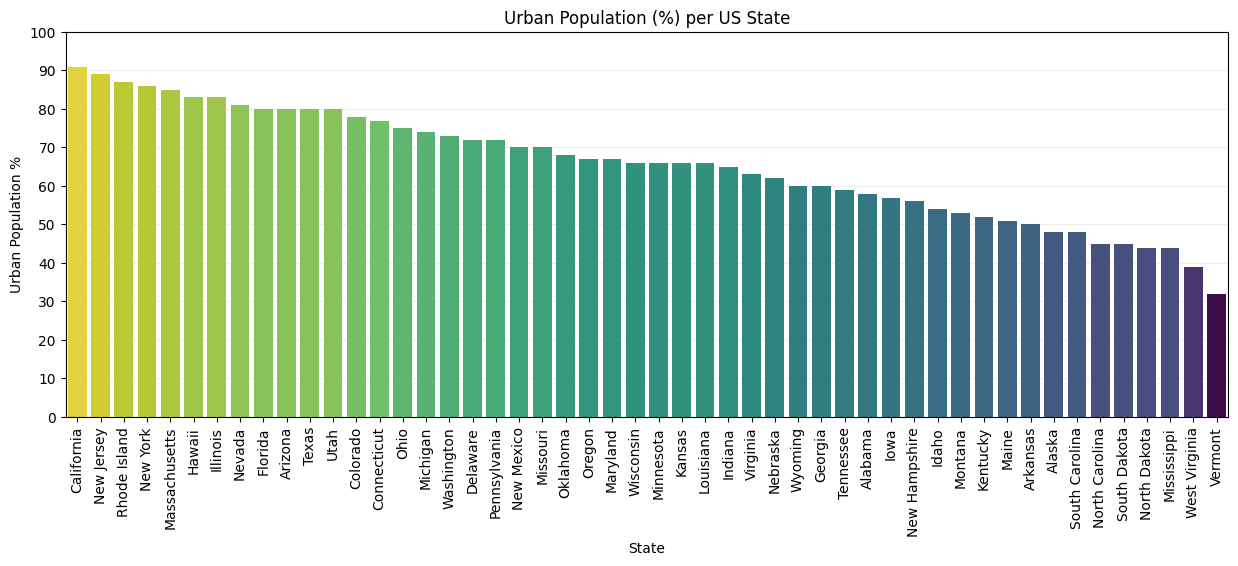

In [ ]:
# Sort by urban pop
state_pop = arrest_df_og.sort_values('UrbanPop', ascending=False)

# Urban population per state
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(
    data=state_pop,
    x='City',
    y='UrbanPop',
    hue='UrbanPop',
    palette='viridis',
    legend=False
)

# Labels
plt.title("Urban Population (%) per US State")
plt.xlabel("State")
plt.ylabel('Urban Population %')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 101, 10))

# Set grid behind bars
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

We saw earlier that the range for the urban population was around 32-91%. From the above plot, we can see that the 32% urban population belong to Vermont while the 91% belong to California. Following California, we have New Jersey, Rhode Island, New York and Massachusetts. Interestingly, Rhode Island is the smallest US state (source 1) and yet has the 3rd highest urban population. Alaska, on the other hand is the largest US state (source 1), and yet it is near the lower end as the state with the 8th urban population.

1. Source:
https://www.britannica.com/place/Alaska

Next, we will look at which states have the highest of each crime rate.

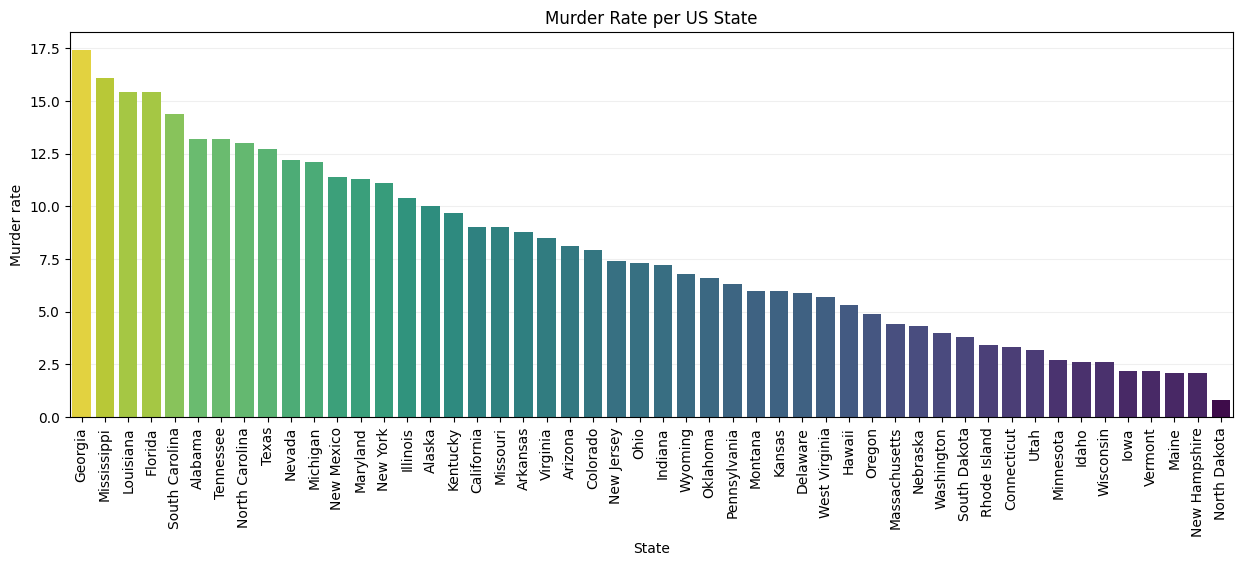

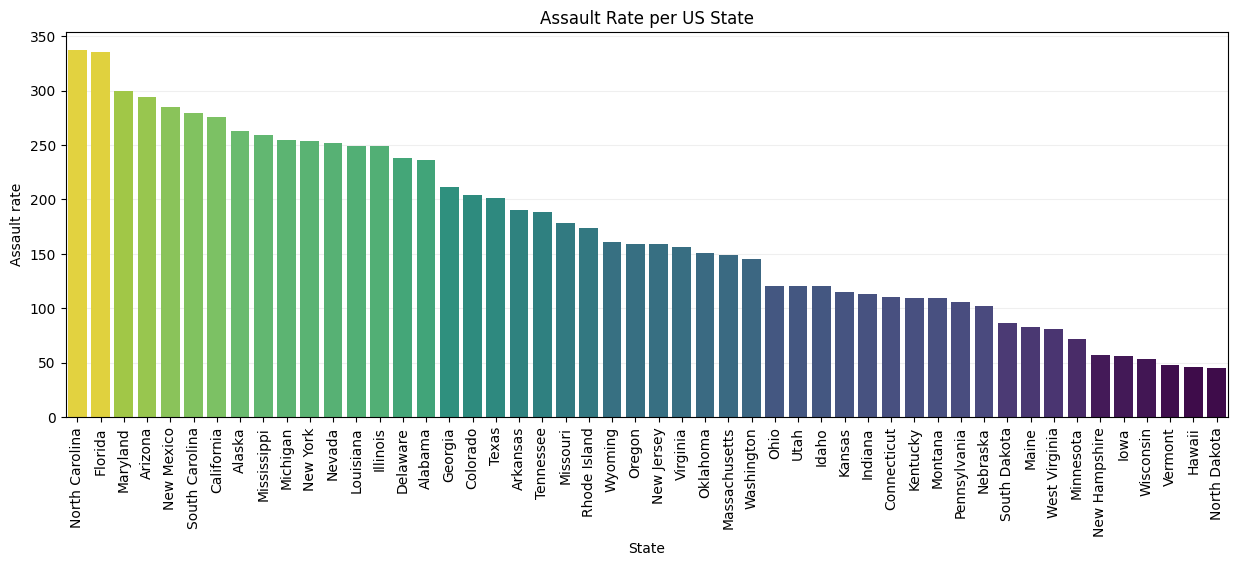

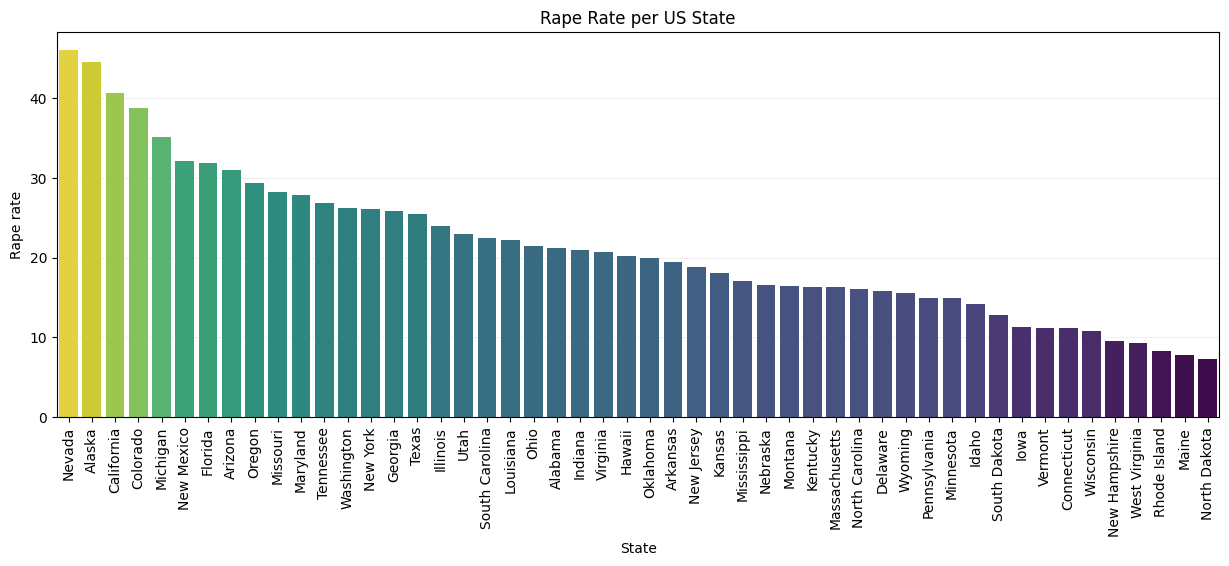

In [ ]:
# Create list of rates
rates = ['Murder', 'Assault', 'Rape']

# Loop through each rate
for r in rates:
    # Sort the rates in descending order
    state_rate = arrest_df_og.sort_values([r], ascending=False)

    # Plot rate per state
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(
        data=state_rate,
        x=state_rate.index,  # Use 'City' (index) as x
        y=state_rate[r],
        hue=state_rate[r],
        palette='viridis',
        legend=False
    )

    # Labels
    plt.title(f"{r} Rate per US State")
    plt.xlabel("State")
    plt.ylabel(f'{r} rate')
    plt.xticks(rotation=90)

    # Set grid behind bars
    ax.set_axisbelow(True)
    ax.grid(axis='y', alpha=0.2)

Findings from the above plots regarding crime rates pet US state:

According to our statistical description, the range for the murder rate was 0.8-17.4. From the first plot, we can see that the lowest rate belongs to North Dakota followed by New Hampshire, Maine and Vermont and Iowa who all have rates below 2.5. The highest rate belongs to Georgia followed by Mississippi, Louisiana and Florida who all have rates above 15. Interestingly, these are all Southern states in the lower right corner of the US.

The range for the assault rate is 45-337. North Dakota, again has the lowest rate followed by Hawaii, Vermont, Wisconsin, Iowa and New Hampshire. North Carolina and Florida (4th on the murder rate rank) have the highest rates, both above 300. Mississippi, which had the second highest murder rate, appear 9th on the assault rankings. 

The range for the rape rate is 7.3-46. Once again, North Dakota is on the lower end followed by Maine, Rhode Island, West Virginia, and New Hampshire. Nevada has the highest rate followed by Alaska and California, all three with rates above 40. 

From this, it can be assumed that states such as North Dakota, New Hampshire, Maine, Vermont and Iowa, that consistently appear on the lower end of these rates, are much safer than most states. Some states keep appearing in the top quartile of each crime, suggesting that there may be some sort of positive relationship. This will be confirmed shortly.

Next, we will look at each crime rate paired with each other crime rate to see if there are any trends. We will also be taking note of the distribution of each features among itself.

Text(0.5, 1.02, 'Relationships between Feaures')

<Figure size 640x480 with 0 Axes>

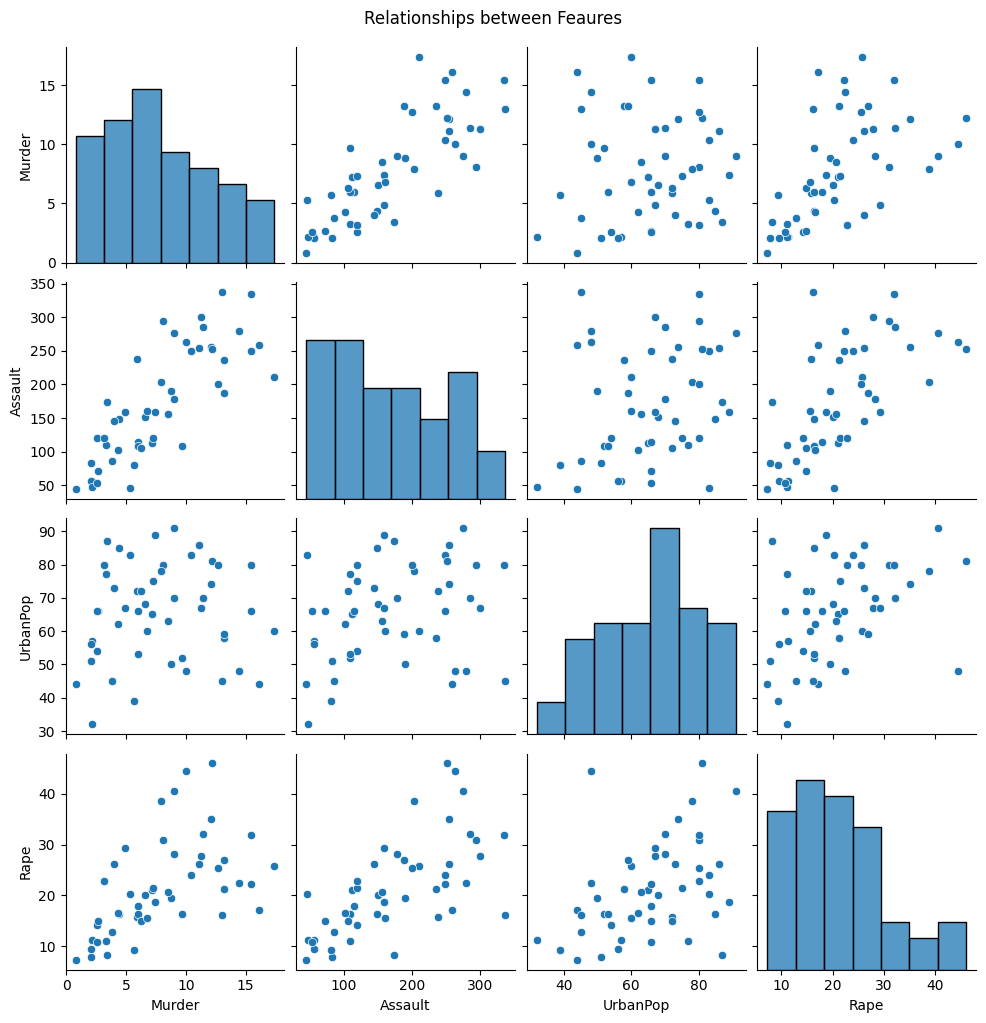

In [13]:
# Comparison of all features against each other.
plt.figure()
sns.pairplot(arrest_df_og)
plt.suptitle("Relationships between Feaures", y=1.02)

There are some positive relationships between the murder and assault rates, the murder and rape rates, the rape and assault rates and also slighly in the rape and urban population rate as indicated by the upwards trends of data points in these plots. States with higher rates in one crime tend to have higher rates in the other crimes. The histograms mostly look skewed right suggesting that more states have lower rates in comparison to the number of states with higher rates.

We will no confirm some of these relationships via correlation analysis.

Text(0.5, 1.0, 'Correlation between Features')

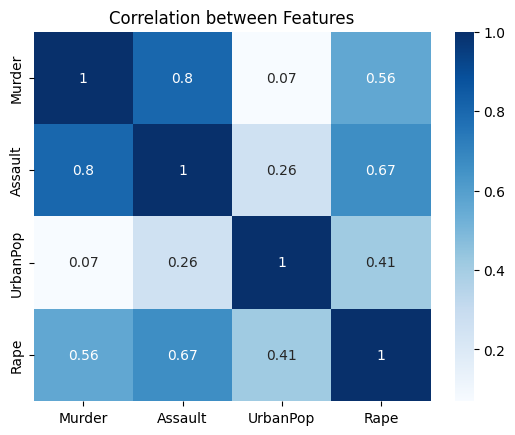

In [14]:
# Get correlation matrix
us_corr = arrest_df_og.corr()

# Visualize correlation matrix
fig, ax = plt.subplots()
sns.heatmap(data=us_corr, annot=True, cmap='Blues')
plt.title("Correlation between Features")

As expected, there is a strong correlation between the murder and assault rates (0.8), the murder and rape rates (0.56) and the murder rape and assault rates (0.67). There are no negative relationships between the features, but there are very low positive relationships between the murder and urban population rates (0.07), which would suggest almost no correlation, the assault and urban population rates (0.26) and a slightly stronger relationship between the rape and urban population rates (0.41). 

Since some of the features are more strongly correlated to one another, this makes it ideal for Principal Component Analysis (PCA) to help reduce the redundancy and multicollinearity between the features (source 1). However, to do this, we must first scale the data. The reason for this is because of the different scales of the rates. As seen in the Relationships between Features plot, some of the rates (assault) have a scale of 0-300, while others have scales of 0-15 (murder), 0-80 (urban population) and 0-40 (rape). 


1. Source:
https://web.cs.ucdavis.edu/~vemuri/papers/pcaVisualization.pdf

### PCA

Since there is a lot of variance, standardization will be used. This is also best as PCA takes variance into account and standardization will the equalize the variance which will also help eliminate bias and distortion due to unexpected outliers. After standardization, PCA will be applied.

In [15]:
# Select X from the dataset
X = arrest_df_og.values.squeeze()

# Initialize standard scaler and fit to data
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

# Initialize PCA and fit to data
pca = PCA()
X_sc_pca = pca.fit_transform(X_sc)

# Create dataframe out of PCA transformed data
pca_df = pd.DataFrame(X_sc_pca)
pca_df.head()

,0,1,2,3
0,0.985566,-1.133392,-0.444269,-0.156267
1,1.950138,-1.073213,2.040003,0.438583
2,1.763164,0.745957,0.054781,0.834653
3,-0.141420,-1.119797,0.114574,0.182811
4,2.523980,1.542934,0.598557,0.341996


Next, we will create a biplot out of the PCA transformed data.

In [16]:
# Get features and labels for biplot
point_labels = arrest_df_og.index  # States will be point labels
arrow_labels = arrest_df_og.columns

print("Labels for data points:", point_labels)
print("Labels for arrows:", arrow_labels)

Labels for data points: Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='City')
Labels for arrows: Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


The following biplot function has been adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

In [ ]:
# Biplot function
def biplot(pca_point, arrow_coef, arrow_label, point_label):
    # Extract first two principal components (x & y coordinates)
    x_pc = pca_points[:, 0]
    y_pc = pca_points[:, 1]

    # Number of original features
    n = arrow_coef.shape[0]

    # Normalize scatter plot so data fits
    scale_x = 1.0/(x_pc.max() - x_pc.min())
    scale_y = 1.0/(y_pc.max() - y_pc.min())

    # Create plotting space
    fig, ax = plt.subplots(figsize=(13, 7))

    # Plot data points on scatterplot
    ax.scatter(x_pc * scale_x, y_pc * scale_y, s=5)

    # Annotate the data points
    for i in range(0, len(x_pc)):
        annotation = point_labels[i]
        ax.annotate(annotation, (x_pc[i]*scale_x, y_pc[i]*scale_y), fontsize=8)

    # Draw arrows
    for i in range(n):
        ax.arrow(
            0, 0,
            arrow_coef[i, 0],
            arrow_coef[i, 1],
            color='r',
            head_width=0.02,
            alpha=0.5
        )
        # Use 'Variable' if arrow labels were not specified
        if arrow_label is None:
            ax.text(
                arrow_coef[i, 0]*1.1,
                arrow_coef[i, 1]*1.1,
                'Variable'+str[i+1],
                color='g',
                ha='center',
                va='center'
            )
        # Use arrow labels of specified
        else:
            ax.text(
                arrow_coef[i, 0]*1.1,
                arrow_coef[i, 1]*1.1,
                arrow_labels[i],
                color='g',
                ha='center',
                va='center'
            )

    plt.title("Principal Component Analysis of US Arrests Dataset")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

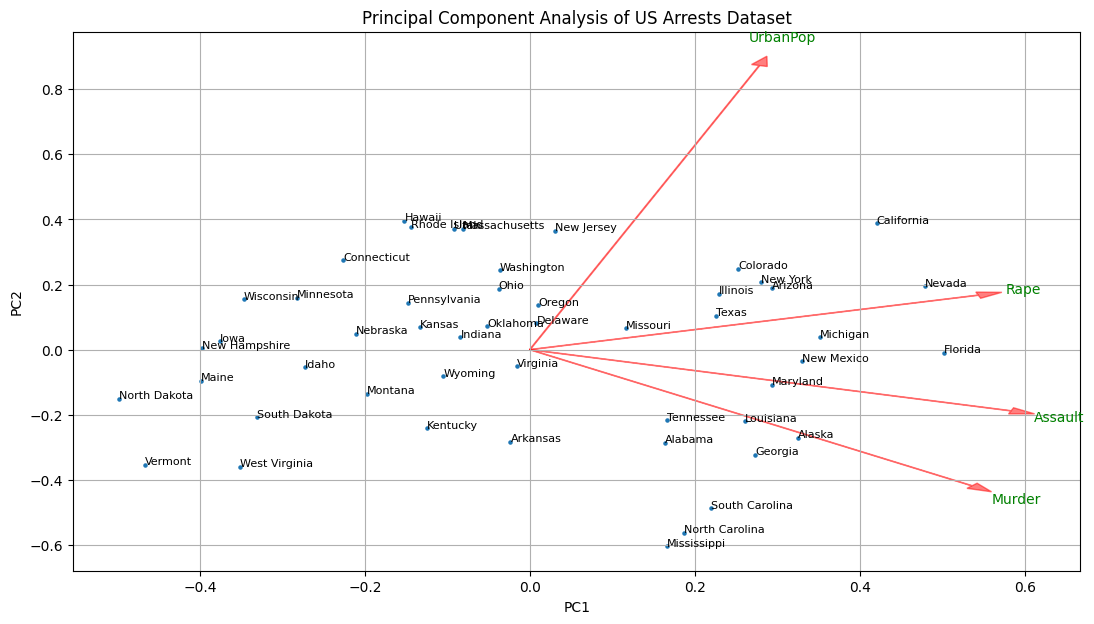

In [ ]:
# Get features for biplot's arguments
pca_points = pca_df.iloc[:, :2].values
arrow_coefs = np.transpose(pca.components_[0:2, :])

# Visualize biplot of PCA transformed data
biplot(
    pca_point=pca_points,
    arrow_coef=arrow_coefs,
    arrow_label=arrow_labels,
    point_label=point_labels
)

In this PCA biplot, each data point represents a state and each arrow represents the features contribution.  The first principal component (PC1) has split the datapoints into more or less two clusters with the split being around the 0.1 mark. PC1 is not negatively influenced by any of the features which suggest that the states with the highest rates are all more to the right and those with the lowest rates are to the left. PC1 is most strongly influenced by the rape, assault and murder rates as indicated by how close to horizontal these arrows are (especially the rape and assault rates) with the assault rate seemingly being the strongest influencer. Principal component 2 (PC2) is both positively and negatively influenced by some of the features. The assault and murder rates negatively influence PC2 while the rape rate and urban population percentage positively influence PC2. The urban population percentage have the strongest influence on PC2 suggesting that state that are more urbanized are situated to the top of the graph, while states that are less urbanized are at the bottom. Therefore, PC1 is more informative of the crime level while PC is more informative of the urbanization level.

Next, we will look at the feature importance to get a more numerical view of the influence of each feature (arrow) on each principal component.

In [19]:
# Feature importance
pc1 = abs(pca.components_[0])
pc2 = abs(pca.components_[1])

# Create dataframe for it
features_df = pd.DataFrame()
features_df['Features'] = list(arrow_labels)
features_df["PC1's Feature Imp"] = pc1
features_df["PC2's Feature Imp"] = pc2
print("Feature importance")
features_df

Feature importance


,Features,PC1's Feature Imp,PC2's Feature Imp
0,Murder,0.535899,0.418181
1,Assault,0.583184,0.187986
2,UrbanPop,0.278191,0.872806
3,Rape,0.543432,0.167319


In the above plot, we are looking at the loadings (directions) of each feature (arrow) which is an indication of how much each feature contributes to each of the two principal components. As expected, urban population has a much stronger influence on PC2 (0.87) than on PC1 (0.27). For the rest of the features, PC1 is the component that is stronger influenced. PC1 is most strongly influenced by the assault rate (0.58).

Next, we will look at the explained variance and the cumulative explained variance to determine how many prinicipal components (PCs) to use in the analysis going forward.

### Selecting number of principal components

To select the number of PCs, we will use the cumulative explained variance to determine the minimum number of PCs that explain a good quantity variance and we will also use the Scree plot using the explained variance to determine where after which point adding more PCs become unnecessary.

Text(0, 0.5, 'Explained Variance')

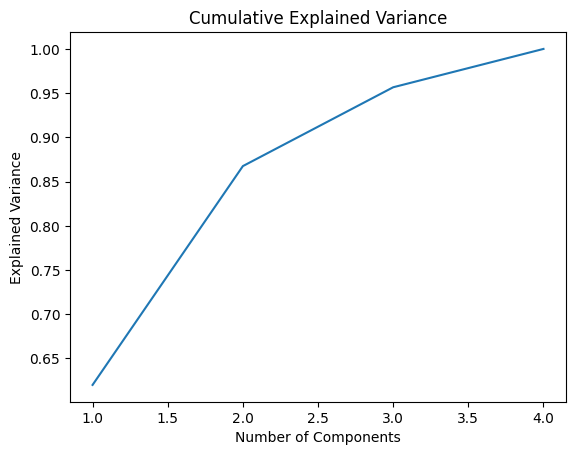

In [20]:
# Cumulative Explained Variance
x_cumul_ex = range(1, len(pca.explained_variance_ratio_) + 1)
y_cumul_ex = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x_cumul_ex, y_cumul_ex)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

Text(0, 0.5, 'Explained Variance')

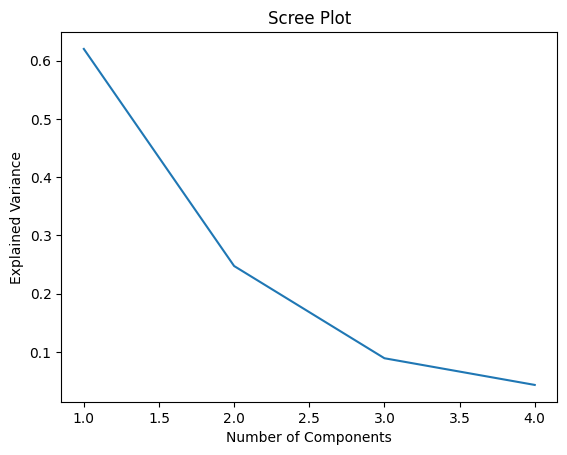

In [21]:
# Scree plot
x_scree = range(1, len(pca.explained_variance_ratio_) + 1)
y_scree = pca.explained_variance_ratio_
plt.plot(x_scree, y_scree)
plt.title("Scree Plot")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

According to the above plots, 2 principal components will be sufficient to move forward with in this analysis. This is because, when looking at the Cumulative Explained Variance graph, 2 components already explain approximately 87% of the dataset. According to the Scree plot, the elbow (the point after which addition PCs does not add much information) occurs at 2 components. Therefore, we will now extract the first 2 PCs.

In [22]:
# Extract first 2 principal components and set index to be states
pca_df_2 = pca_df.iloc[:, :2].set_index(arrest_df_og.index)
print("PCA dataframe with first 2 PCs extracted")
pca_df_2.head()

PCA dataframe with first 2 PCs extracted


,0,1
City,,
Alabama,0.985566,-1.133392
Alaska,1.950138,-1.073213
Arizona,1.763164,0.745957
Arkansas,-0.141420,-1.119797
California,2.523980,1.542934


Next, we will use two clustering techniques to cluster the dataset into groups.

### Hierarchical clustering

For hierarchical clustering, we will first create three dendrograms using three different linkages: single, average and complete, to determine which of these linkage methods group the dataset into balanced clusters the best.

Text(0.5, 0.98, 'Hierarchical Clustering using Dendrograms with Different Linkages')

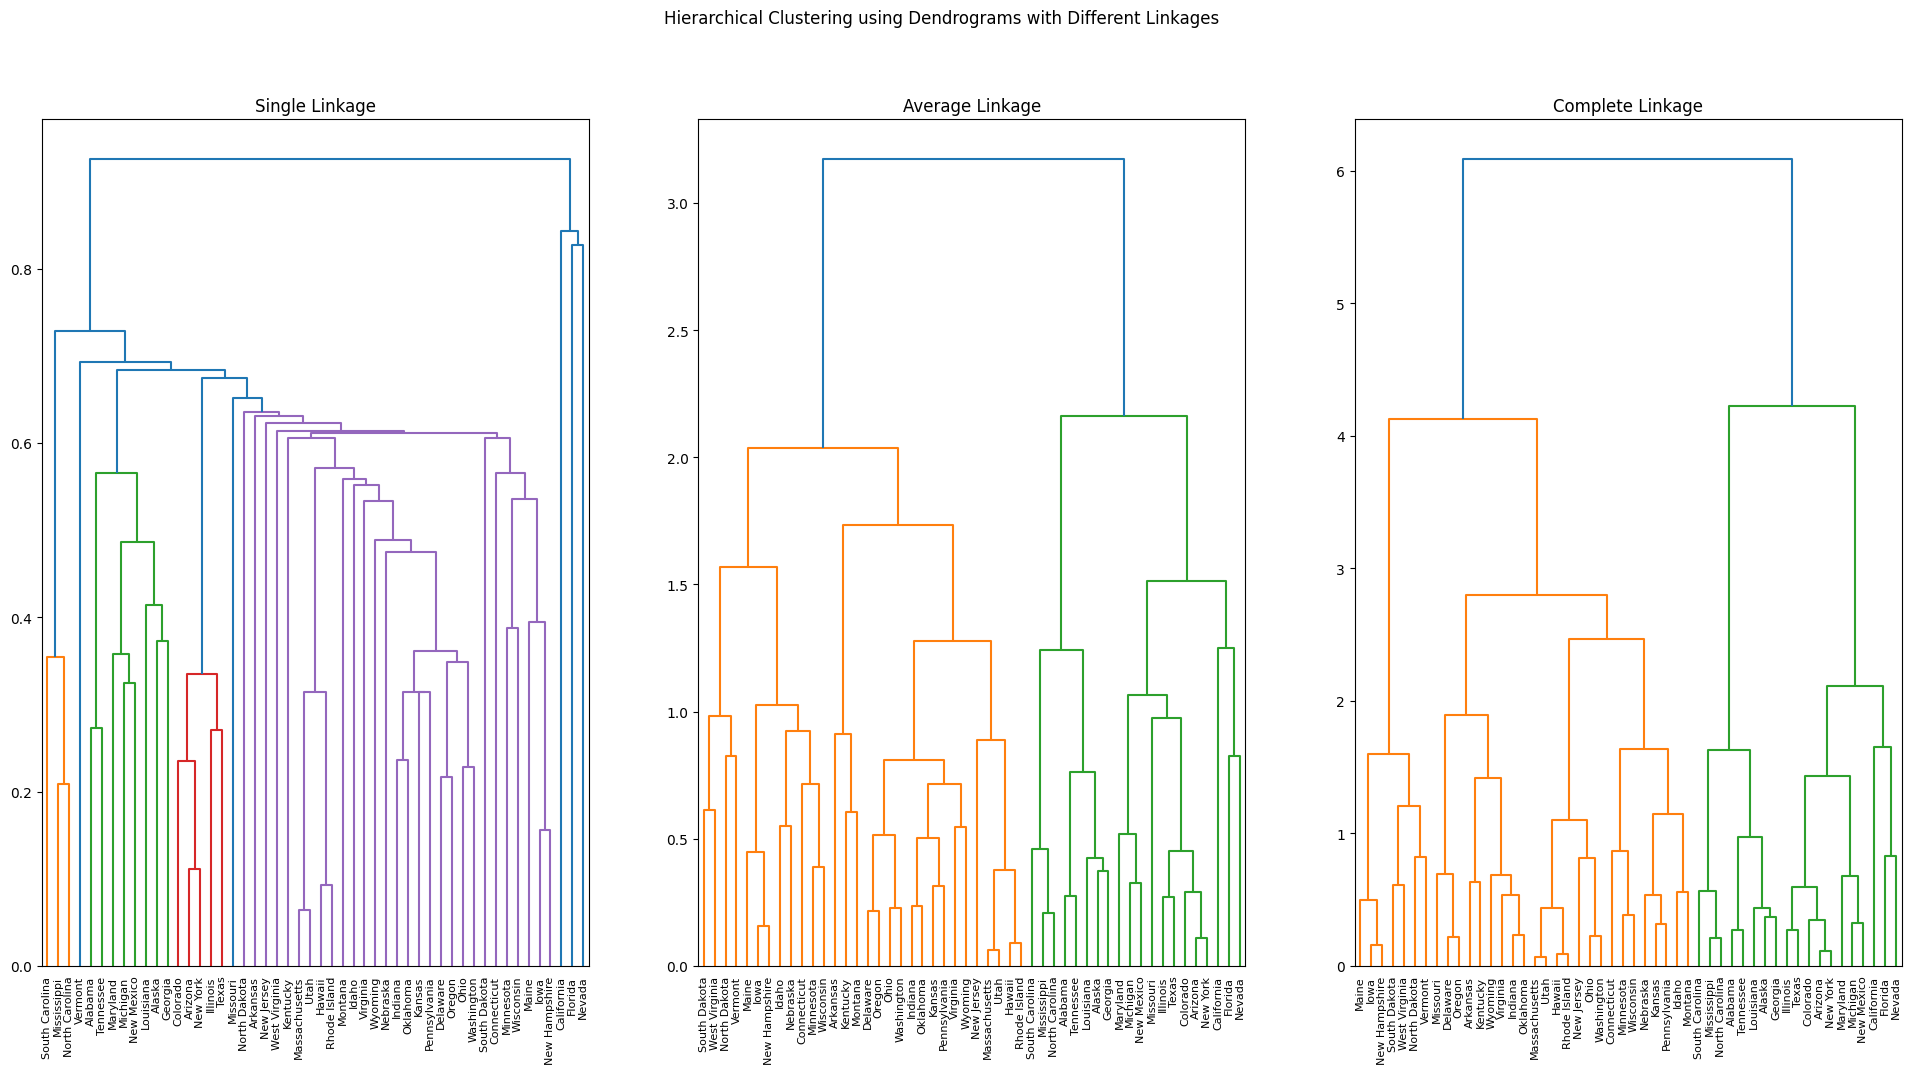

In [23]:
# Create plots for the dendrograms
fig, ax = plt.subplots(1, 3, figsize=(24, 11))

# Create dedrogrames
dendrogram(
    linkage(pca_df_2, method='single'), labels=pca_df_2.index, ax=ax[0]
)
ax[0].set_title('Single Linkage')
dendrogram(
    linkage(pca_df_2, method='average'), labels=pca_df_2.index, ax=ax[1]
)
ax[1].set_title('Average Linkage')
dendrogram(
    linkage(pca_df_2, method='complete'), labels=pca_df_2.index, ax=ax[2]
)
ax[2].set_title('Complete Linkage')

plt.suptitle(
    "Hierarchical Clustering using Dendrograms with Different Linkages"
)

In the above dendrograms, the single linkage method looks most out of balance with elongated clusters and will not be used going forward. The average and complete linkage methods is much more balanced with shorter clusters. The average method, where clusters are formed based on the average distance between all pairs of points across clusters, does have longer clusters than the complete linkage method where clusters are formed using the farthest distance between clusters. The better choice would thus be the complete linkage. Let's take a better look at this method.

Text(0.5, 1.0, 'Complete Linkage')

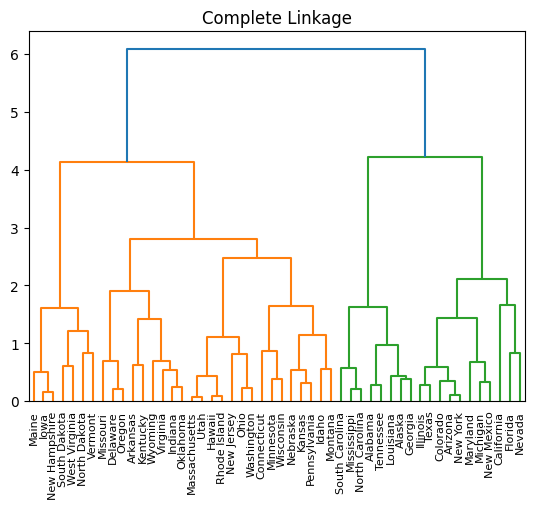

In [24]:
# Dendrogram with complete linkage method.
plt.figure()
dendrogram(linkage(pca_df_2, method='complete'), labels=pca_df_2.index)
plt.title('Complete Linkage')

We will nou use this dendrogram to create a scatter plot of the data. According to the dendrogram, there are 2 distinct groups. We will thus use 2 as the value for k (number of clusters).

Text(0, 0.5, 'PC2')

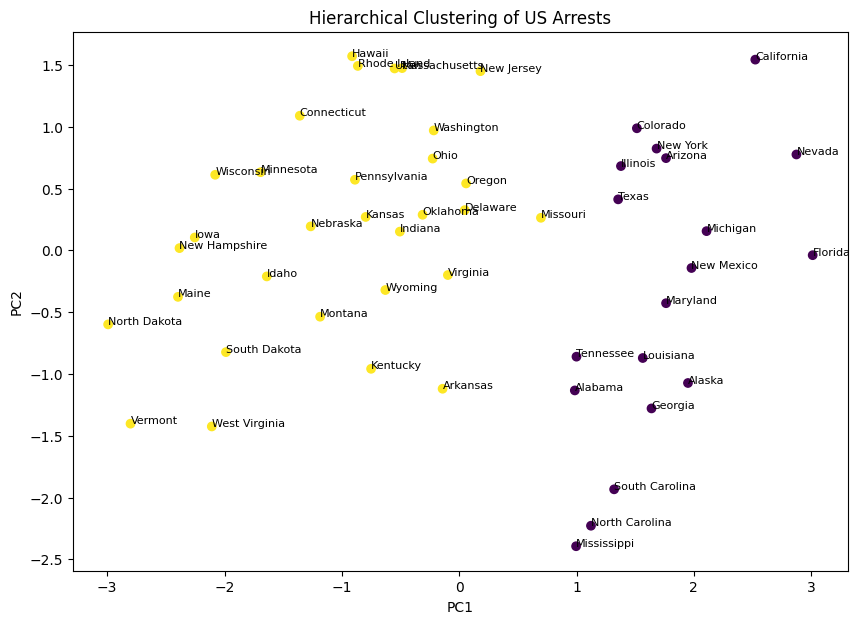

In [25]:
# Select variables for plot
x_pc = pca_df_2.iloc[:, 0].values
y_pc = pca_df_2.iloc[:, 1].values

k = 2
link = 'complete'

# Initialize and fit AgglomerativeClustering model to data
hier_model = AgglomerativeClustering(n_clusters=k, linkage=link)
hier_model.fit(pca_df_2)

# Plot hierarchical model
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=x_pc, y=y_pc, c=hier_model.labels_)

# Annotate data points
for i in range(0, len(x_pc)):
    annotation = point_labels[i]
    ax.annotate(annotation, (x_pc[i], y_pc[i]), fontsize=8)

# Labels
plt.title("Hierarchical Clustering of US Arrests")
plt.xlabel("PC1")
plt.ylabel("PC2")

In this scatter plot, each point represents a state as plotted by it PC1 and PC2 coordinates. We can see that the hierarchical model clustered the states that were previously mentioned to be lower in crime rates (North Dakota, Vermont, New Hampshire, etc.) in yellow to the left and states that showed higher crime rates (Florida, Nevada, California, etc) in purple the right.

Next, we will look at the silhouettes score to evaluate how well the hierarchical model clustered the data.

In [26]:
# Evaluate hierarchical model with silhouette score
hier_sil = silhouette_score(X_sc_pca, hier_model.labels_)

print("Hierarchical clustering model silhouette score:", hier_sil)

Hierarchical clustering model silhouette score: 0.4047944502519567


The silhouette score of ~0.4048 of the hierarchical model shows a fair to good clustering technique.

We will now compare the hierarchical clustering to KMeans clustering.

### KMeans clustering

As before, we will set k to the value of 2 as suggested by the complete linkage dendrogram.

Text(0, 0.5, 'PC2')

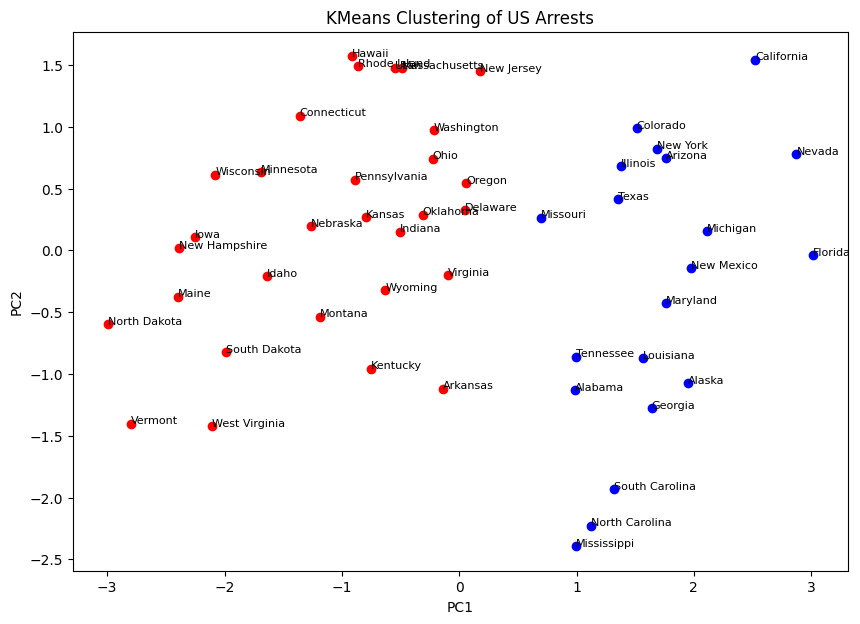

In [27]:
# Select variables for plot
x_pc = pca_df_2.iloc[:, 0].values
y_pc = pca_df_2.iloc[:, 1].values

k = 2

# Initialise and fit KMeans model to data
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_assign = kmeans.fit_predict(pca_df_2)

# Plot kmeans clusters
fig, ax = plt.subplots(figsize=(10, 7))
colours = 'rbgy'
for i in range(0, k):
    ax.scatter(
        x=x_pc[cluster_assign == i], y=y_pc[cluster_assign == i], c=colours[i]
    )

# Annotate data points
for i in range(0, len(x_pc)):
    annotation = point_labels[i]
    ax.annotate(annotation, (x_pc[i], y_pc[i]), fontsize=8)

# Labels
plt.title("KMeans Clustering of US Arrests")
plt.xlabel("PC1")
plt.ylabel("PC2")

As with the hierarchical method, the KMeans clustering technique also separates the states with the lower crime and urbanization rates to the left in red and the states with higher crime rates and urbanization toe the left in blue. There is a slight difference in the states assigned to each cluster. In the hierarchical method, Missouri is assigned to the cluster with lower crime rates and urbanization (yellow) while in the KMeans method, Missouri is assigned to the cluster with higher crime rates and urbanization (blue). To settle which model did better in terms of cluster assignment, we will look at the silhouette score of the KMeans model.

In [28]:
# Evaluate hierarchical model with silhouette score
kmeans_sil = silhouette_score(X_sc_pca, kmeans.labels_)

print("KMeans clustering model silhouette score:", kmeans_sil)

KMeans clustering model silhouette score: 0.4084890326217641


The silhouette score of ~0.4085 of the KMeans model is slightly higher than the ~0.4048 if the hierarchical model which suggests that the KMeans model did better with cluster assignment than the hierarchical model.

### Conclusion

In this task, we saw that there was a lot of variation in the crime rates across the 50 states. We saw that states such as California, New Jersey, Rhode Island and New York had the higher urban population % while states such as Vermont, West Virginia, Mississippi and the Dakota’s have a lower population%. Georgia, Mississippi, Louisiana and Florida all had murder rates above 15 while North Dakota, New Hampshire, Maine, Vermont and Iowa all had murder rates less than 2.5 suggesting that they are safer. North Carolina and Florida had the highest assault rates of more than 300 while, once again, North Dakota had the lowest along with Hawaii, Vermont, Wisconsin, Iowa and New Hampshire. Nevade, Alaska and California had the highest rape rate of more than 40 while North Dakota, Maine, Rhode Island, West Virginia and New Hampshire had the lowest rape rates of less than 10. With some of these states reoccurring in the top or bottom quartile, it can be assumed that states such as North Dakota, Maine and New Hampshire seem safer than states such as Florida, California, etc.

There were some relationships (all positive) between the features. The strongest positive relationship seemed to have been between assault and murder (0.8). Other relationships were between rape and assault rates (0.67) and rape and murder rates (0.56). This multicollinearity made this dataset ideal for PCA. 

Since the scales were quite different for each rate, the dataset was first standardized and the PCA was applied. The PCA biplot showed that PC1 was positively influenced by all the features and, according to the feature importance, the assault rate was its strongest influencer (0.58) followed by the rape rate and then murder rate. The urban population % had the least amount of influence on PC1, but it had the largest influence on PC2 (0.87). PC2 was negatively influenced by the assault and murder rates while positively influenced by the urbanization and rape rates.

According to the Scree plot and Cumulative Explained Variance plot, the minimum number of components that provided enough information about the dataset was 2 components.

Hierarchical clustering using the first 2 principal component showed that complete linkage with 2 clusters was ideal to separate the dataset into 2 clusters. One cluster had the states with the lower crime rates and lower urbanization while the other cluster had states with higher crime rates and urbanization. The silhouette score was calculated to be 0.4048 which is fair to good.

Kmeans clustering using 2 as the value for k shows very similar clustering to the hierarchical method with one cluster being the states with the lower crime rates and urbanization while the other cluster had states with higher crime rates and urbanization. There was, however, a difference in the states belonging to each cluster where the hierarchical methods clustered Missouri with the lower crime rated states while the KMeans method clustered Missouri with the higher crime rated states. Using the silhouette score to evaluate the KMeans model, we saw that the score of 0.4085 for the KMeans model was slightly higher than that of the hierarchical model which suggest better clustering.

In conclusion, both clustering techniques did very well in clustering the states into two groups. PCA proved valuable in reducing the dimensionality and uncovering meaningful patterns withing the dataset.